In [56]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import matplotlib.image as mpimg

In [66]:
# == parameters ==
run_number = "233706"
raw_data_dir = "/xustrg0/2025A8039/"
processed_data_dir = "/UserData/girelli/sacla2024/processed"

In [67]:
# == Load data == 
file_path = processed_data_dir + f"/Iq_{run_number}_combined.h5"  
if not os.path.exists(file_path):
    raise FileNotFoundError(f"Combined file not found at: {file_path}")

with h5py.File(file_path, "r") as f:
    I = f["I"][:]
    q = f["q"][:]
    phi = f["phi"][:]
    image_ids = f["image_id"][:]
    print("=== Run Metadata ===")
    for key in ["run", "shots", "images", "start_tag", "stop_tag"]:
        if key in f:
            print(f"{key}: {f[key][()]}")  # f[key][()] loads the scalar value
        else:
            print(f"{key}: Not found")
    
print(f"I shape: {I.shape}")
print(f"q shape: {q.shape}, phi shape: {phi.shape}")


=== Run Metadata ===
run: 233706
shots: 199
images: 199
start_tag: 379523343
stop_tag: 379523743
I shape: (199, 36, 100)
q shape: (100,), phi shape: (36,)


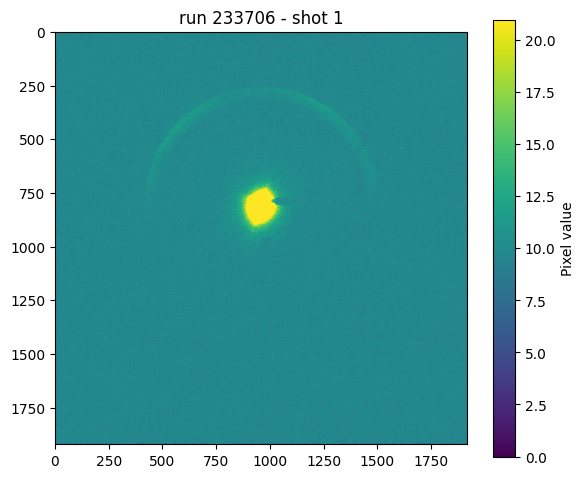

In [68]:
# == Load and plot one shot from raw data
shot=1
raw_path = raw_data_dir+f"{run_number}/data_{shot:06}.img"
raw_image=mpimg.imread(raw_path)

plt.figure(figsize=(6, 5))
plt.imshow(raw_image, vmax =21, vmin = 0)
plt.colorbar(label="Pixel value")
plt.title(r"run %i - shot %i"%(int(run_number), shot))
plt.tight_layout()
plt.show()

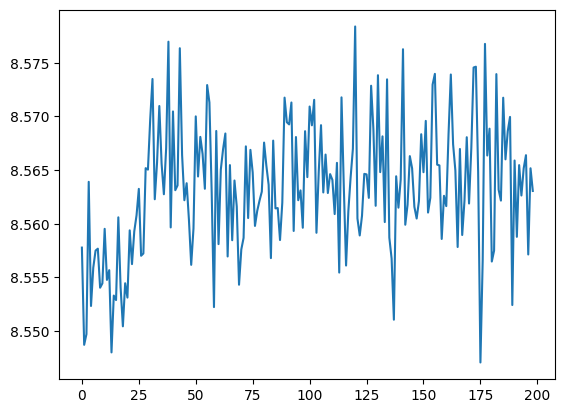

In [69]:
plt.figure()
plt.plot(np.mean(I[:,30:,30:,],axis=(1,2)))

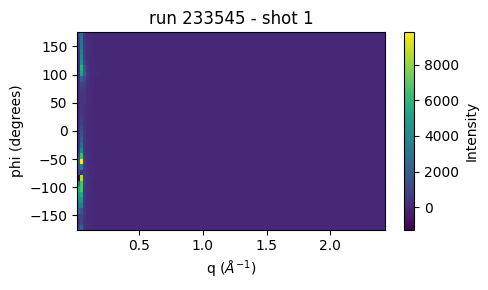

In [17]:
# == Plot I(q,phi)
shot=1
plt.figure(figsize=(5, 3))
plt.imshow(I[shot], extent=(q[0], q[-1], phi[0], phi[-1]), aspect="auto", origin="lower")
plt.colorbar(label="Intensity")
plt.xlabel("q ($\AA^{-1}$)")
plt.ylabel("phi (degrees)")
plt.title(r"run %i - shot %i"%(int(run_number), shot))
plt.tight_layout()
plt.show()

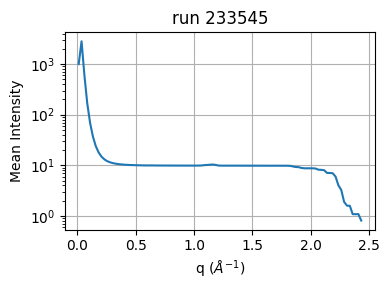

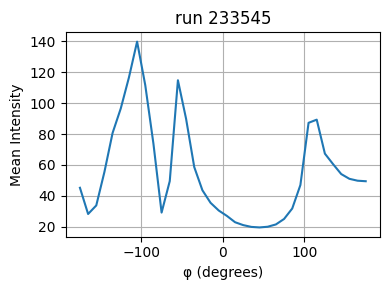

In [19]:
# Mean I(q) over all shots and phi
I_mean_q = np.mean(I, axis=(0, 1))

# Mean I(phi) over all shots and q
I_mean_phi = np.mean(I, axis=(0, 2))

# Plot I(q)
plt.figure(figsize=(4, 3))
plt.semilogy(q, I_mean_q)
plt.xlabel("q ($\AA^{-1}$)")
plt.ylabel("Mean Intensity")
plt.title(r"run %i"%(int(run_number)))
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot I(phi)
plt.figure(figsize=(4, 3))
plt.plot(phi, I_mean_phi)
plt.xlabel("φ (degrees)")
plt.ylabel("Mean Intensity")
plt.title(r"run %i"%(int(run_number)))
plt.grid(True)
plt.tight_layout()
plt.show()


